## Get the silhoutte coefficient of the two cluster k-means solution. You'll notice that the silhoutte coefficient will turn out to be greater than the one above where cluster number is three. We know that the Iris dataset consists of three different clusters. How do you explain that the silhoutte score of the solution with the number of clusters being equal to the correct number of classes is lower than the one where the number of clusters is different from the correct number of classes?

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [3]:
# Data frame to store features and predicted cluster memberships.
ytahmin = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_yarı1, X_pcayarı1),
    (X_yarı2, X_pcayarı2)]):
    
    # Put the features into ypred.
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

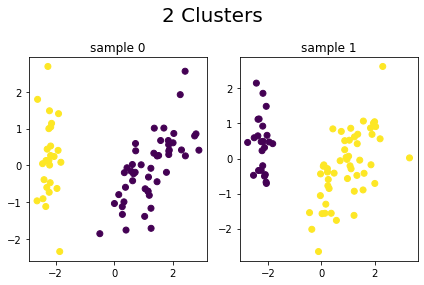

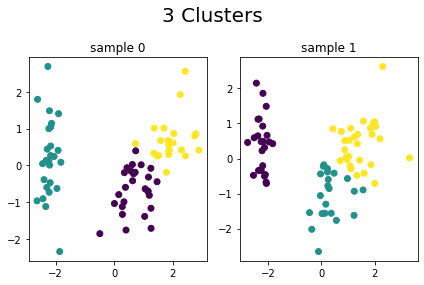

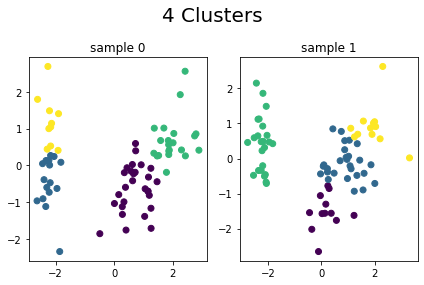

In [4]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [5]:
for i in range(6):
    etiketler = KMeans(n_clusters=i+2, random_state=123).fit_predict(X_std)
    print(i+2,"cluster değeri için silhouette",metrics.silhouette_score(X_std, etiketler, metric='manhattan'))


2 cluster değeri için silhouette 0.620856286288675
3 cluster değeri için silhouette 0.49585177684295917
4 cluster değeri için silhouette 0.3894273157845072
5 cluster değeri için silhouette 0.34577651435370427
6 cluster değeri için silhouette 0.3379420607483462
7 cluster değeri için silhouette 0.33282944265104003


Analiz sonucunda verilerin 2-3 kümeden oluştuğu arasında bir kararsızlık arasında kalınır, 4-5-6-7 kümeleyeceği aşikar.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [8]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=42)

In [9]:
# Data frame to store features and predicted cluster memberships.
ytahmin = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_yarı1, X_pcayarı1),
    (X_yarı2, X_pcayarı2)]):
    
    # Put the features into ypred.
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

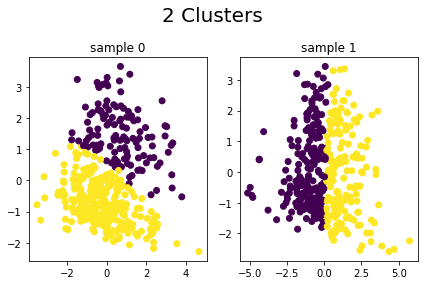

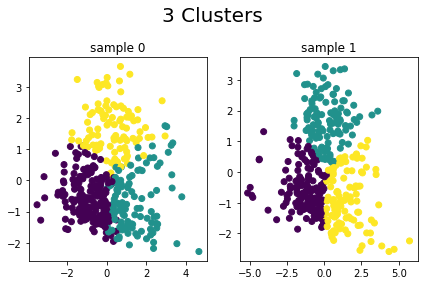

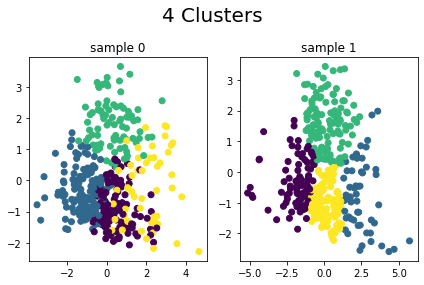

In [10]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [11]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [12]:
for i in range(2,6):    
    full_pred = KMeans(n_clusters=i, random_state=42).fit_predict(X_std)
    print(i,"değeri için RI",rand_index_score(y, full_pred))
    print(i,"değeri için ARI",metrics.adjusted_rand_score(y, full_pred),"\n")

2 değeri için RI 0.5572169708822251
2 değeri için ARI 0.11393290890218274 

3 değeri için RI 0.3531820404172099
3 değeri için ARI 0.1219458537600582 

4 değeri için RI 0.32998560408518035
4 değeri için ARI 0.13705543779388432 

5 değeri için RI 0.2295061929595828
5 değeri için ARI 0.0834344852291418 



In [13]:
# silhouette & adjusted rand score of the model with various clusters
silhouette_scores = []
adjusted_rand_index = []
for i in range(2,10):
    etiketler = KMeans(n_clusters=i, random_state=42).fit_predict(X_std)
    silhouette_score=metrics.silhouette_score(X_std, etiketler)
    silhouette_scores.append(silhouette_score)
    ari_value = metrics.adjusted_rand_score(y, etiketler)
    adjusted_rand_index.append(ari_value)
    if i>5:
        pass
    else:
        print("Silhouette score with {0} clusters: {1:.3f}".format(i, silhouette_scores[i-2]))
        print("Adjusted Rand Index with {0} clusters: {1:.3f}".format(i, ari_value),"\n")

Silhouette score with 2 clusters: 0.196
Adjusted Rand Index with 2 clusters: 0.114 

Silhouette score with 3 clusters: 0.180
Adjusted Rand Index with 3 clusters: 0.122 

Silhouette score with 4 clusters: 0.194
Adjusted Rand Index with 4 clusters: 0.137 

Silhouette score with 5 clusters: 0.164
Adjusted Rand Index with 5 clusters: 0.083 



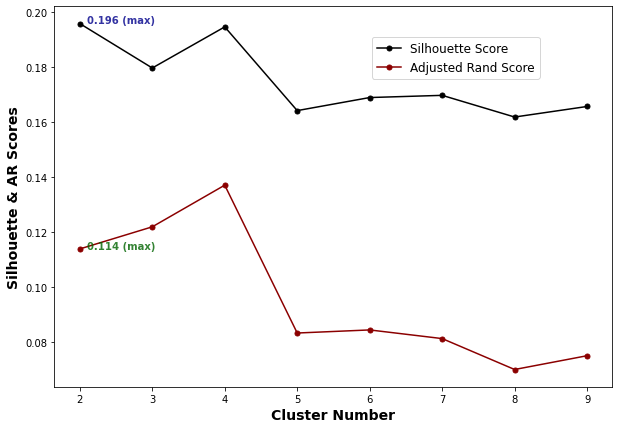

In [14]:
plt.figure(figsize=(10,7))

# silhouette plot
plt.plot(list(range(2,10)), silhouette_scores, label="Silhouette Score", 
         color="black", 
         marker=".", markersize=10)
# text for the 2 clusters model
plt.text(x=2.1, y=(silhouette_scores[0]),
         s=f"{silhouette_scores[0]:.3f} (max)",
         color="darkblue",
         weight="bold",
         alpha=0.8)

# adjusted rand plot
plt.plot(list(range(2,10)), adjusted_rand_index, label="Adjusted Rand Score",
         color="darkred", 
         marker=".", markersize=10)
# text for the 2 clusters model
plt.text(x=2.1, y=(adjusted_rand_index[0]),
         s=f"{adjusted_rand_index[0]:.3f} (max)",
         color="darkgreen",
         weight="bold",
         alpha=0.8)

plt.xlabel("Cluster Number", size=14, weight="bold")
plt.ylabel("Silhouette & AR Scores", size=14, weight="bold")
plt.legend(fontsize="large", frameon=True, framealpha=0.8, loc=(0.569, 0.81))
plt.show()

Silüet puanı küme sayısının 2 olduğu modelde en yüksek değerdedir, fakat Adjusted Rand indeksi için aynı şeyi söyleyemiyoruz, o cluster number 4 olduğu zaman peak noktasına ulaşmıştır. Bu nedenle küme sayımızın 2 mi yoksa 4 mü olduğu konuda karar vermemiz çok zordur.